<a href="https://colab.research.google.com/github/Aishaamalik/Medical-Data-Visualizer/blob/main/Medical_Data_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Medical Data Visualizer**

Please upload your medical_examination.csv file


Saving medical_examination (1).csv to medical_examination (1) (1).csv
 Generating Categorical Plot...


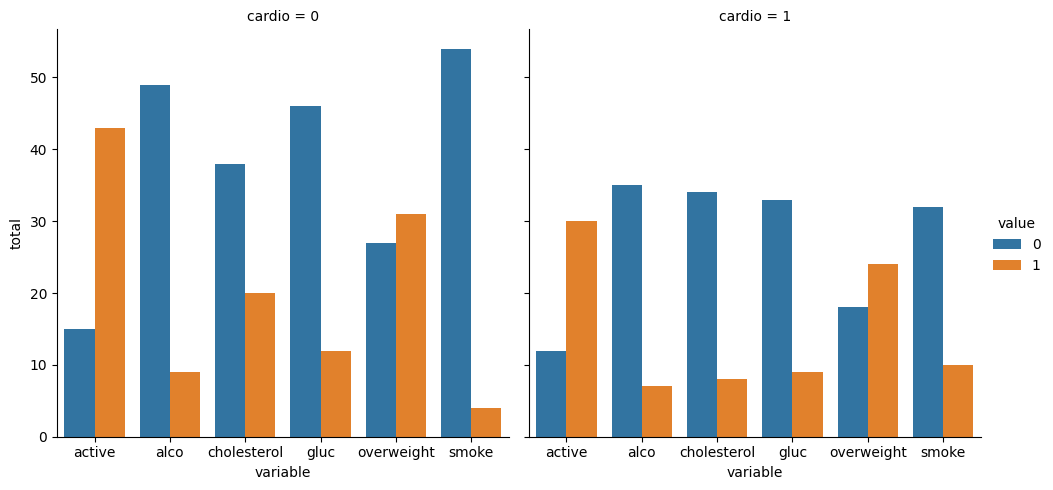

Generating Heat Map...


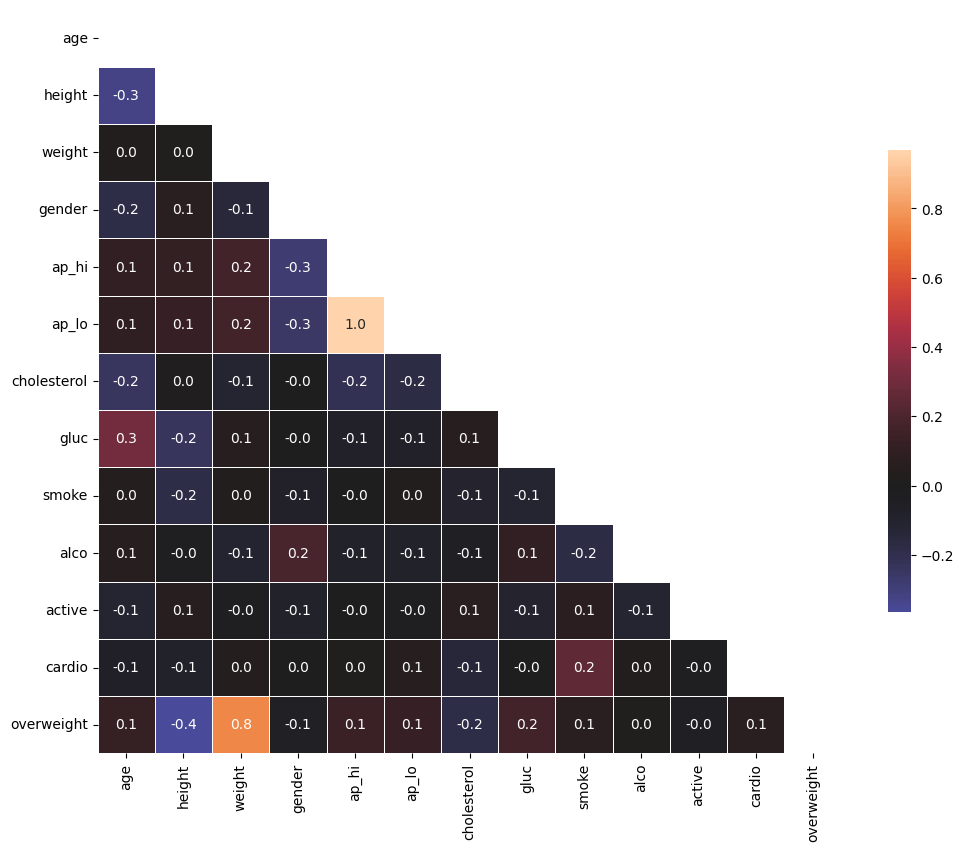

In [3]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

print("Please upload your medical_examination.csv file")
from google.colab import files
uploaded = files.upload()

import io
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

df.columns = df.columns.str.lower().str.strip()

df['overweight'] = (df['weight'] / ((df['height'] / 100) ** 2) > 25).astype(int)

df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)

def draw_cat_plot():
    df_cat = pd.melt(
        df,
        id_vars=['cardio'],
        value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight']
    )
    df_cat = df_cat.groupby(['cardio', 'variable', 'value']) \
                   .size() \
                   .reset_index(name='total')

    fig = sns.catplot(
        x='variable',
        y='total',
        hue='value',
        col='cardio',
        data=df_cat,
        kind='bar'
    ).fig
    return fig

def draw_heat_map():
    df_heat = df[
        (df['ap_lo'] <= df['ap_hi']) &
        (df['height'] >= df['height'].quantile(0.025)) &
        (df['height'] <= df['height'].quantile(0.975)) &
        (df['weight'] >= df['weight'].quantile(0.025)) &
        (df['weight'] <= df['weight'].quantile(0.975))
    ]
    corr = df_heat.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    fig, ax = plt.subplots(figsize=(12, 12))
    sns.heatmap(
        corr,
        mask=mask,
        annot=True,
        fmt='.1f',
        center=0,
        square=True,
        linewidths=.5,
        cbar_kws={'shrink': .5},
        ax=ax
    )
    return fig

print(" Generating Categorical Plot...")
fig_cat = draw_cat_plot()
plt.show(fig_cat)

print("Generating Heat Map...")
fig_heat = draw_heat_map()
plt.show(fig_heat)
